# Create Dataframe for K-Means

In [4]:
data_dic = {"f1": [1.0, 1.5, 3.0, 5.0, 3.5, 4.5, 3.5],
            "f2": [1.0, 2.0, 4.0, 7.0, 5.0, 5.0, 4.5]}

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame(data_dic, index=range(1, len(data_dic['f1']) + 1))
df

,f1,f2
1,1.0,1.0
2,1.5,2.0
3,3.0,4.0
4,5.0,7.0
5,3.5,5.0
6,4.5,5.0
7,3.5,4.5


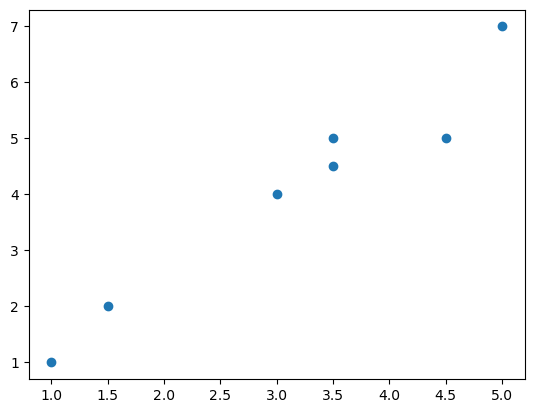

In [9]:
plt.scatter(df['f1'], df['f2'])

## Initial Clusters
#### Now we set K = 2 (Number of Clusters)

In [10]:
k = 2
c1 = (1.0, 1.0)
c2 = (5.0, 7.0)

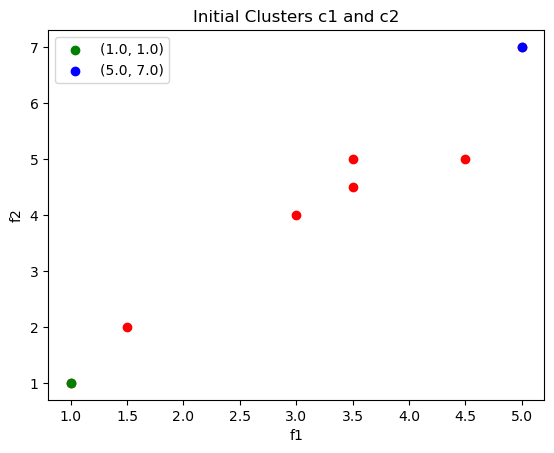

In [334]:
## below colors i important for demonstration of clusters
# colors = ['r' if [df.iloc[i][0], df.iloc[i][1]] == list(c1) else 'g' for i in range(len(df))]
plt.scatter(df['f1'], df['f2'], color='red')
plt.scatter(list(c1)[0], list(c1)[1], label=c1,  color="green")
plt.scatter(list(c2)[0], list(c2)[1], label=c2,  color="blue")
plt.xlabel("f1")
plt.ylabel("f2")
plt.title("Initial Clusters c1 and c2")
plt.legend()
plt.show()

In [78]:
### Demonstration of Euclidian distance.
### Subtract each point of df from c1 and c2. Here you can show process of c1 only. Next, we make function of it.
np.sqrt((c1[0] - df.iloc[1][0])**2 + (c1[1] - df.iloc[1][1])**2)


1.118033988749895

In [479]:
def distance(c1, df):
    distance_from_cluster_1 = []
    distance_from_cluster_2 = []
    
    # make a 2 clusters
    cluster_1 = []
    cluster_2 = []
    for i in range(len(df)):
            # calculate c1 distance
            distance_1 = np.sqrt((c1[0] - df.iloc[i][0])**2 + (c1[1] - df.iloc[i][1])**2)
            distance_from_cluster_1.append(distance_1)
            
            # calculate c2 distance
            distance_2 = np.sqrt((c2[0] - df.iloc[i][0])**2 + (c2[1] - df.iloc[i][1])**2)
            distance_from_cluster_2.append(distance_2)
            
            if distance_1<=distance_2:
                cluster_1.append(tuple(df.iloc[i]))
                cluster_1 = pd.DataFrame(cluster_1, columns=['f1','f2'])
            else:
                cluster_2.append(tuple(df.iloc[i]))
                cluster_2 = pd.DataFrame(cluster_2, columns=['f1','f2'])
    print("CLUSTER 1: ", cluster_1)
    print("CLUSTER 2: ", cluster_2)
#     print("Mean of cluster 1: ", np.mean(cluster_1))
#     print("Mean of cluster 2: ", np.mean(cluster_2))
                                       
#     return cluster_1, cluster_2

In [480]:
cluster_1, cluster_2 = distance(c1, df)

pd.DataFrame(cluster_1, columns=['f1','f2'])

C:\Users\rcc\AppData\Local\Temp\ipykernel_10472\94641910.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_1.append(tuple(df.iloc[i]))


TypeError: cannot concatenate object of type '<class 'float'>'; only Series and DataFrame objs are valid

In [473]:
# distance_from_cluster_1, distance_from_cluster_2 = distance(c1, df)

In [443]:
distance_from_cluster_1

[0.0,
 1.118033988749895,
 3.605551275463989,
 7.211102550927978,
 4.716990566028302,
 5.315072906367325,
 4.301162633521313]

In [346]:
distance_from_cluster_2

[7.211102550927978,
 6.103277807866851,
 3.605551275463989,
 0.0,
 2.5,
 2.0615528128088303,
 2.9154759474226504]

In [404]:
for count, (d1, d2) in enumerate(zip(distance_from_cluster_1, distance_from_cluster_2)):
    cluster_1 = []
    cluster_2 = []
    if d1<=d2:
        print(df)
        cluster_1.append()
        print("cluster 1: ", d1)
    else:
        print("cluster 2: ", d2)

    print(count+1, d1)

    f1   f2
1  1.0  1.0
2  1.5  2.0
3  3.0  4.0
4  5.0  7.0
5  3.5  5.0
6  4.5  5.0
7  3.5  4.5


TypeError: list.append() takes exactly one argument (0 given)

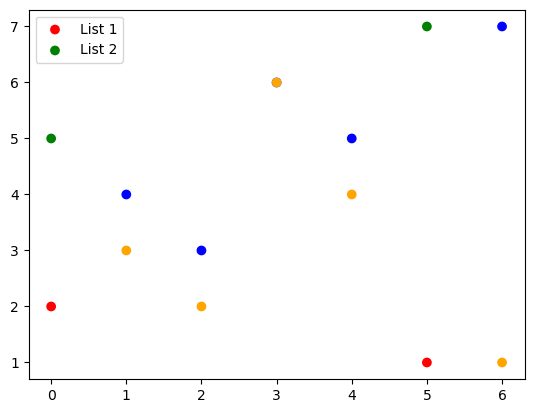

In [335]:
import matplotlib.pyplot as plt

# Define the two lists with 7 elements each
list1 = [2, 4, 3, 6, 5, 1, 7]
list2 = [5, 3, 2, 6, 4, 7, 1]

# Define colors based on the comparison of elements
colors1 = ['red' if x < y else 'blue' for x, y in zip(list1, list2)]
colors2 = ['green' if x < y else 'orange' for x, y in zip(list1, list2)]

# Plot the elements of list1
plt.scatter(range(len(list1)), list1, c=colors1, label='List 1')

# Plot the elements of list2
plt.scatter(range(len(list2)), list2, c=colors2, label='List 2')

# Add legend
plt.legend()

# Show the plot
plt.show()
